# **911 Calls Analysis**

For this notebook we will be analyzing some 911 call data. The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

**Import numpy and pandas**

In [7]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline.**

In [8]:
import seaborn as sns
# sns.color_palette("viridis")

import matplotlib.pyplot as plt
%matplotlib inline

**Read in the csv file (911.csv) as a dataframe called df**

In [9]:
import os

In [10]:
df = pd.read_csv("911.csv")

**Check the info() of df**

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        663522 non-null  float64       
 1   lng        663522 non-null  float64       
 2   desc       663522 non-null  object        
 3   zip        583323 non-null  float64       
 4   title      663522 non-null  object        
 5   timeStamp  663522 non-null  datetime64[ns]
 6   twp        663229 non-null  object        
 7   addr       663522 non-null  object        
 8   e          663522 non-null  int64         
 9   Reason     663522 non-null  object        
 10  Hour       663522 non-null  int64         
 11  Month      663522 non-null  int64         
 12  dayOfWeek  663522 non-null  object        
 13  Date       663522 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 70.9+ MB


**Check the head of df**

In [12]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1


### **Questions on the dataset?**

**What are the top 5 zipcodes for 911 calls?**

In [13]:
df["zip"].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [14]:
df["twp"].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

**Number of unique title codes**

In [15]:
df["title"].nunique()

148

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [16]:
df["Reason"] = df["title"].apply(lambda x: x.split(':')[0])

**What is the most common Reason for a 911 call based off of this new column?**

In [17]:
df["Reason"].value_counts().head()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

**Now use seaborn to create a countplot of 911 calls by Reason.**

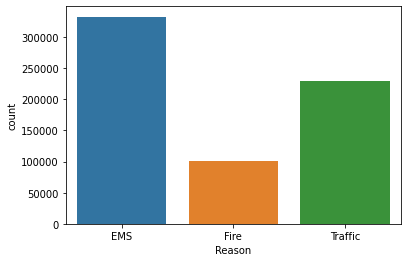

In [18]:
sns.countplot(x="Reason", data=df)
plt.show()

**Now let us begin to focus on time information. Let's find out the data type of the objects in the timeStamp column?**

In [19]:
# df["timeStamp"].dtype
type(df["timeStamp"][0])

str

**We have seen that these timestamps are still strings. Let's use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [20]:
df["timeStamp"] = pd.to_datetime(df['timeStamp'], format="%Y-%m-%d %H:%M:%S")
# eg: 2015-12-10 17:02:01

**We can now grab specific attributes from a Datetime object by calling them. For example:**



In [21]:
time = df['timeStamp'].iloc[0]
print(time)
print("hour:", time.hour)
print("month:", time.month)
print("dow:", time.dayofweek)

2015-12-10 17:10:52
hour: 17
month: 12
dow: 3


**Now that the timestamp column are actually DateTime objects, let's use .apply() to create 3 new columns called Hour, Month, and Day of Week. We will create these columns based off of the timeStamp column**

In [22]:
df["Hour"] = df["timeStamp"].apply(lambda x: x.hour)
df["Month"] = df["timeStamp"].apply(lambda x: x.month)
df["dayOfWeek"] = df["timeStamp"].apply(lambda x: x.dayofweek)

**We have noticed how the Day of Week is an integer 0-6. Let's use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [23]:
df["dayOfWeek"].sample()

174880    2
Name: dayOfWeek, dtype: int64

In [24]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df["dayOfWeek"] = df["dayOfWeek"].map(dmap)

**Now let's use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

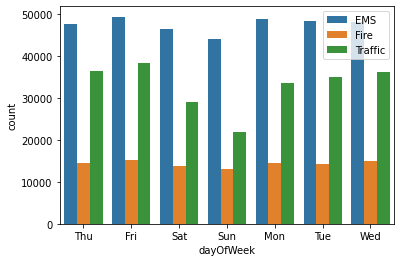

In [25]:
sns.countplot(data=df, x="dayOfWeek", hue="Reason")
plt.legend(loc='upper right')
plt.show()

**Let's do the same for Month:**

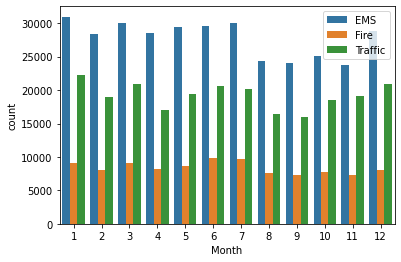

In [26]:
sns.countplot(data=df, x="Month", hue="Reason")
plt.legend(loc='upper right')
plt.show()

**Let's create a groupby object called byMonth, where we group the DataFrame by the month column and use the count() method for aggregation. We are going to use the head() method on this returned DataFrame**

In [27]:
byMonth = df.groupby(by="Month").count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,dayOfWeek
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


**Now let's create a simple plot off of the dataframe indicating the count of calls per month**

In [28]:
byMonth["title"]

Month
1     62336
2     55427
3     60027
4     53671
5     57509
6     60034
7     59832
8     48359
9     47213
10    51240
11    50182
12    57692
Name: title, dtype: int64

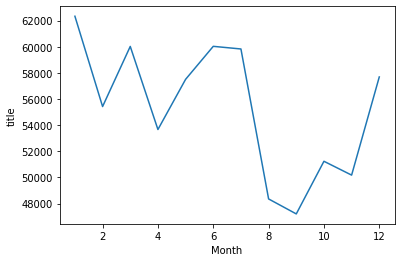

In [29]:
sns.lineplot(data=byMonth["title"])
plt.show()

**Now let's see if we can use seaborn's lmplot() to create a linear fit on the number of calls per month**

In [30]:
x = byMonth.reset_index()
x

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,dayOfWeek
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
2,3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
3,4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
4,5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
5,6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
6,7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
7,8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
8,9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213
9,10,51240,51240,51240,44582,51240,51240,51220,51240,51240,51240,51240,51240


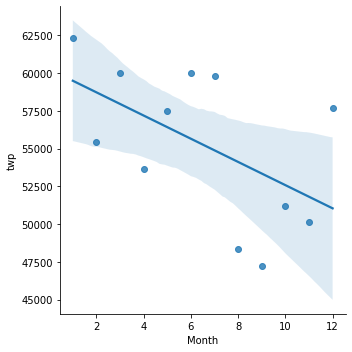

In [31]:
sns.lmplot(data=x, x="Month", y="twp")
plt.show()

**Let's create a new column called 'Date' that contains the date from the timeStamp column. We'll use apply along with the .date() method** 

In [32]:
df["Date"] = df["timeStamp"].apply(lambda x: x.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,dayOfWeek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


**Let's groupby this Date column with the count() aggregate and create a plot of counts of 911 calls**

In [33]:
byDate = df.groupby(by="Date").count().reset_index()
byDate

,Date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,dayOfWeek
0,2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
1,2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2,2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
3,2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
4,2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,2020-07-25,318,318,318,271,318,318,318,318,318,318,318,318,318
1690,2020-07-26,296,296,296,271,296,296,296,296,296,296,296,296,296
1691,2020-07-27,329,329,329,288,329,329,329,329,329,329,329,329,329
1692,2020-07-28,370,370,370,335,370,370,370,370,370,370,370,370,370


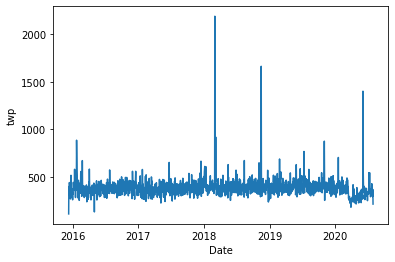

In [34]:
sns.lineplot(data=byDate, x="Date", y="twp")
plt.show()

**Let's create 3 separate plots with each plot representing a Reason for the 911 call**

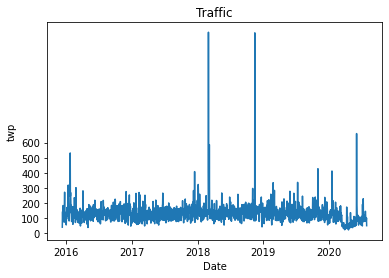

In [35]:
traffic_byDate = df[df["Reason"] == "Traffic"].groupby(by="Date").count()
sns.lineplot(data=traffic_byDate["twp"])
plt.title("Traffic")
plt.yticks(range(0, 700, 100))
plt.show()

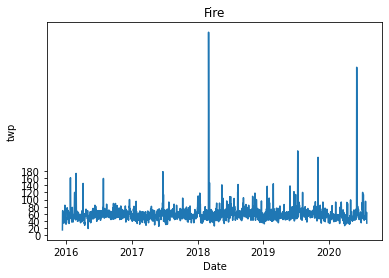

In [36]:
fire_byDate = df[df["Reason"] == "Fire"].groupby(by="Date").count()
sns.lineplot(data=fire_byDate["twp"])
plt.title("Fire")
plt.yticks(range(0, 200, 20))
plt.show()

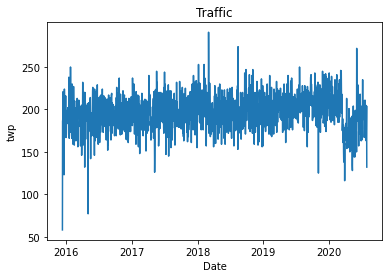

In [37]:
ems_byDate = df[df["Reason"] == "EMS"].groupby(by="Date").count()
sns.lineplot(data=ems_byDate["twp"])
plt.title("Traffic")
plt.yticks(range(50, 300, 50))
plt.show()

**Let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but we'll combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.**

In [38]:
byDayOfWeek = df.groupby(["dayOfWeek","Hour"])["dayOfWeek"].count().unstack()
byDayOfWeek.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


**Let's create a HeatMap using this new DataFrame.**

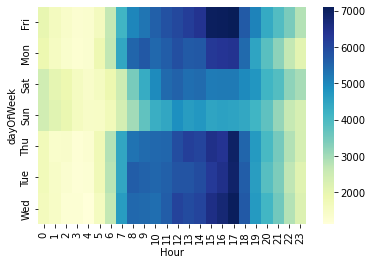

In [39]:
sns.heatmap(byDayOfWeek, cmap="YlGnBu")
plt.show()

**Le's create a clustermap using this DataFrame**

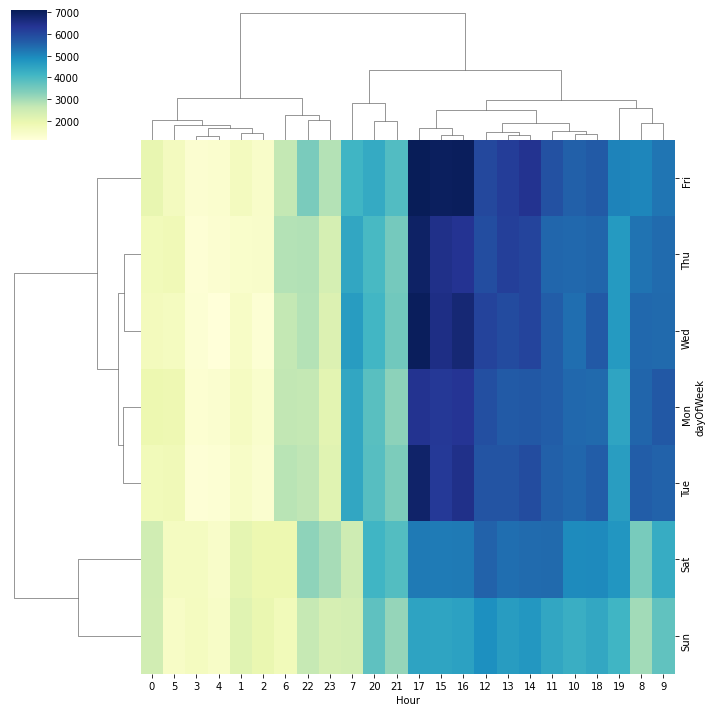

In [40]:
sns.clustermap(byDayOfWeek, cmap="YlGnBu")
plt.show()

**Let's repeat these same plots and operations, for a DataFrame that shows the Month as the column**

In [41]:
byMonthAgain = df.groupby(["dayOfWeek","Month"])["dayOfWeek"].count().unstack()
byMonthAgain.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
dayOfWeek,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


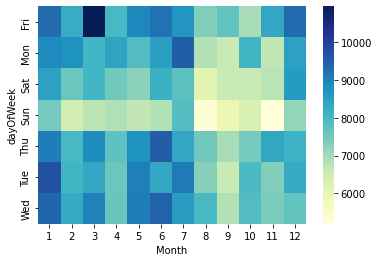

In [42]:
sns.heatmap(byMonthAgain, cmap="YlGnBu")
plt.show()

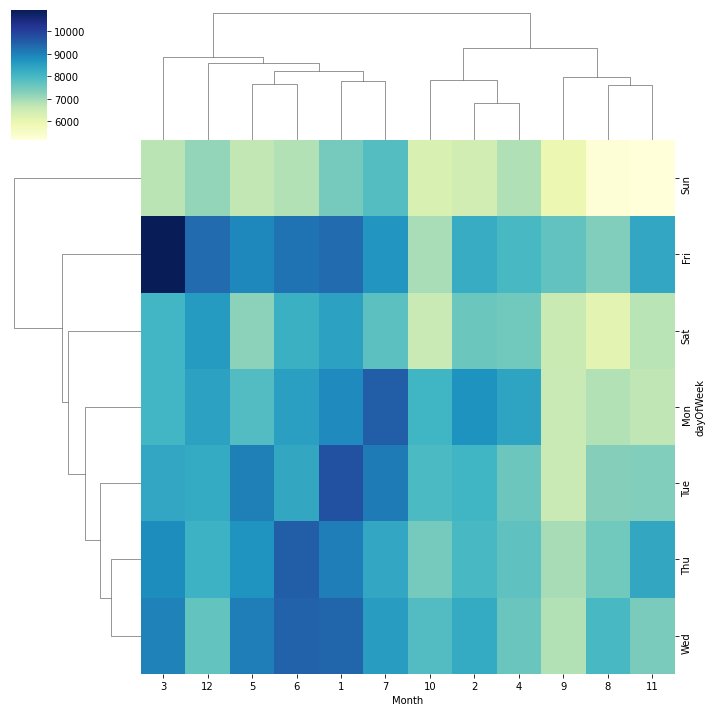

In [43]:
sns.clustermap(byMonthAgain, cmap="YlGnBu")
plt.show()